In [1]:
%matplotlib inline
import matplotlib as plt
from plot_utils import plot_search, plot_search_error

# Demonstration of Quantum State Representation with Neural Networks

For reference, please refer to the full paper.

**1-D ISING MODEL**

In [2]:
from nn_quantum_states.hamiltonians.ising1d import Ising1D
from nn_quantum_states.rbm import RBM

# problem constraints
num_spins = 4
bc_periodic = True
h_field_magnitude = 2

# hyperparameters
alpha = 2
learning_rate = 1.0
iterations = 1000
epochs = 300
therm_factor = 0.01
sweep_factor = 1

hamiltonian = Ising1D(num_spins, bc_periodic, h_field_magnitude)
model = RBM(num_spins, alpha * num_spins, hamiltonian, learning_rate)

In [3]:
ground_energy = hamiltonian.get_exact_ground_energy()
print('Ground energy for 1-D Ising Hamiltonian: %.20f' % ground_energy)

Ground energy for 1-D Ising Hamiltonian: -2.13577920506985652338


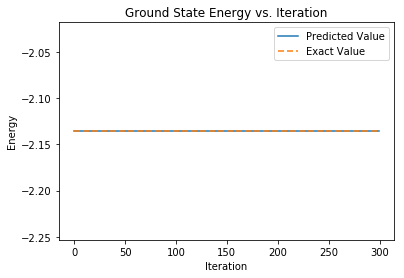

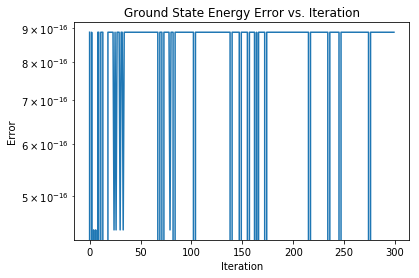

In [5]:
energies = model.optimize(epochs, iterations, therm_factor, sweep_factor)
plot_search(energies, ground_energy, 'img/search_lr_1.pdf')
plot_search_error(energies, ground_energy, 'img/err_lr_1.pdf')